In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from nltk.corpus import wordnet
from nltk import sent_tokenize,word_tokenize
import nltk
from textblob import *
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
import warnings
warnings.filterwarnings('ignore')
import re

In [3]:
df = pd.read_csv("updated_train.csv")
df.head()

,review,pos_neg,review_len
0,room kind clean strong smell dog gener averag ...,0,248
1,stay crown plaza april april staff friendli at...,0,1077
2,book hotel hotwir lowest price could find got ...,0,1327
3,stay husband son way alaska crui love hotel gr...,1,502
4,room one nice clearli updat recent clean bed c...,1,610


In [7]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(min_df=2,max_df = 0.8)

In [6]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(df["review"],df["pos_neg"],test_size=0.2,random_state = 0)

In [12]:
xtrain = cv.fit_transform(list(xtrain))

In [13]:
xtest = cv.transform(list(xtest))

In [18]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()

In [19]:
from sklearn.metrics import plot_confusion_matrix

In [21]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer = TfidfTransformer()
tfidf_transformer.fit(xtrain)
tfidf_transformer.transform(xtrain)
tfidf_transformer.transform(xtest)

<6735x12576 sparse matrix of type '<class 'numpy.float64'>'
	with 341806 stored elements in Compressed Sparse Row format>

In [22]:
from sklearn.metrics import jaccard_similarity_score,plot_confusion_matrix
from sklearn.naive_bayes import MultinomialNB

Jaccard Similarity Score =  0.875426874536006


d:\program files\python\lib\site-packages\sklearn\metrics\_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)


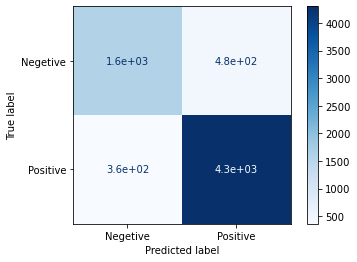

In [27]:
mnb = MultinomialNB()
mnb.fit(xtrain,ytrain)
ypred = mnb.predict(xtest)
plot_confusion_matrix(mnb, xtest, ytest,
                                 display_labels=['Negetive','Positive'],
                                 cmap=plt.cm.Blues,
                                 normalize=None)
print("Jaccard Similarity Score = ",jaccard_similarity_score(ytest,ypred))

In [32]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(xtrain,ytrain)
ypred = xgb.predict(xtest)

Jaccard Similarity Score =  0.8648849294729027


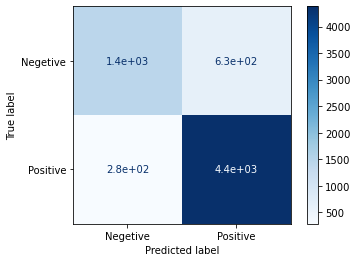

In [33]:
disp = plot_confusion_matrix(xgb, xtest, ytest,
                                 display_labels=['Negetive','Positive'],
                                 cmap=plt.cm.Blues,
                                 normalize=None)
print("Jaccard Similarity Score = ",jaccard_similarity_score(ytest,ypred))

TESTING

In [35]:
contractions = {
"ain't": "am not",
"aren't": "are not",
"can't": "cannot",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he would",
"he'll": "he will",
"he's": "he is",
"how'd": "how did",
"how'll": "how will",
"how's": "how is",
"i'd": "I would",
"i'll": "I will",
"i'm": "I am",
"i've": "I have",
"isn't": "is not",
"it'd": "it would",
"it'll": "it will",
"it's": "it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"mightn't've": "might not have",
"must've": "must have",
"mustn't": "must not",
"mustn't've": "must not have",
"needn't": "need not",
"needn't've": "need not have",
"o'clock": "of the clock",
"oughtn't": "ought not",
"oughtn't've": "ought not have",
"shan't": "shall not",
"sha'n't": "shall not",
"shan't've": "shall not have",
"she'd": "she would",
"she'd've": "she would have",
"she'll": "she will",
"she's": "she is",
"should've": "should have",
"shouldn't": "should not",
"shouldn't've": "should not have",
"so've": "so have",
"so's": "so is",
"that'd": "that would",
"that'd've": "that would have",
"that's": "that is",
"there'd": "there would",
"there'd've": "there would have",
"there's": "there is",
"they'd": "they would",
"they'd've": "they would have",
"they'll": "they will",
"they're": "they are",
"they've": "they have",
"to've": "to have",
"wasn't": "was not",
"we'd": "we would",
"we'd've": "we would have",
"we'll": "we will",
"we'll've": "we will have",
"we're": "we are",
"we've": "we have",
"weren't": "were not",
"what'll": "what will",
"what're": "what are",
"what's": "what is",
"what've": "what have",
"when's": "when is",
"when've": "when have",
"where'd": "where did",
"where's": "where is",
"where've": "where have",
"who'll": "who will",
"who's": "who is",
"who've": "who have",
"why's": "why is",
"why've": "why have",
"will've": "will have",
"won't": "will not",
"would've": "would have",
"wouldn't": "would not",
"wouldn't've": "would not have",
"y'all": "you all",
"y'all'd": "you all would",
"y'all'd've": "you all would have",
"y'all're": "you all are",
"y'all've": "you all have",
"you'd": "you would",
"you'll": "you will",
"you're": "you are",
"you've": "you have"
}

In [36]:
con_keys = list(contractions.keys())
def handle_contractions(review):
    words = review.lower().split()
    for i in range(len(words)):
        if(words[i] in con_keys):
            words[i] = contractions[words[i]]
    sentence = " ".join(words)
    return sentence

In [37]:
import pickle
opposites = pickle.load(open("opposites.pkl","rb"))

In [78]:
opp_keys = list(opposites.keys())
def handle_negation(review):
    review = review.lower()
    review = handle_contractions(review)
    review = sent_tokenize(review)
    final_sent=""
    for sent in review:
        words = word_tokenize(sent)
        tags = nltk.pos_tag(words)
        i = 0
        while(i<len(words)):
            if(tags[i][0]=="not"):
                for j in range(i+1,len(tags)):
                    if(j>=len(words)):
                        i+=1
                        break
                    if(tags[j][1]=='JJ'):
                        if((tags[j][0] in opp_keys) and (opposites[tags[j][0]]!=None)):
                            words[j] = opposites[tags[j][0]]
                            try:
                                del(words[words.index('not')])
                                del(tags[words.index('not')])
                            except:
                                continue
                            break
                        else:
                            i+=1
                            break
                    else:
                        i+=1
                        continue
            else:
                i=i+1
        final_sent+=" ".join(words)
    return final_sent

In [79]:
def review_prepare(review):
    ps=PorterStemmer()
    review = handle_negation(review)
    review = re.sub('[^a-z]',' ',review)
    review = word_tokenize(review)
    stop_words = stopwords.words("english")
    stop_words.remove("not")
    review = [ps.stem(word) for word in review if word not in stop_words]
    review = ' '.join(review)
    return review

In [89]:
def predict(review):
    review = review_prepare(review)
    print(review)
    review  = cv.transform([review])
    ypred = mnb.predict(review)
    return ypred[0]

In [95]:
predict("not worth price")

worthless price


0

In [96]:
predict("worth price")

worth price


1

In [97]:
predict("not good")

bad


0

In [98]:
predict("good")

good


1

### we can now see that it is handling negations pretty well

In [99]:
pickle.dump(cv,open("count_vectorizer.sav","wb"))
pickle.dump(mnb,open("classifier.sav","wb"))

In [ ]:
pickle.dump(contractions,open)